# Exploring Dandiset 001195: Separable Dorsal Raphe Dopamine Projections Mediate the Facets of Loneliness-like State

**Note:** This notebook was generated with the assistance of AI. Please be cautious when interpreting the code or results, and verify findings independently.

## Overview

This dataset supports research into how distinct dopamine projections from the dorsal raphe nucleus (DRN) in the mouse brain modulate aspects of social behavior and affective state, particularly those related to loneliness and motivation. The study investigates DRN dopamine neuron projections to different brain regions (BNST, CeA, BLP) using optogenetics, calcium imaging, ex vivo and in vivo electrophysiology, and behavioral tracking.

**Dandiset on DANDI Archive:** https://dandiarchive.org/dandiset/001195/0.250408.1733

### Key Information:
- **Species:** Mus musculus (mouse)
- **Number of subjects:** 34
- **Number of NWB files:** 230
- **Number of cells recorded:** 131
- **Primary data types:** Ex vivo patch-clamp electrophysiology, optogenetics
- **Key brain areas:** Dorsal Raphe Nucleus (DRN), Central Amygdala (CeA), Bed Nucleus of the Stria Terminalis (BNST)

## Required Packages

This notebook requires the following packages:
- `dandi`
- `pynwb`
- `h5py`
- `remfile`
- `matplotlib`
- `numpy`
- `pandas`

In [1]:
from dandi.dandiapi import DandiAPIClient
import pynwb
import h5py
import remfile
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from itertools import islice

## Exploring the Dandiset with DANDI API

In [2]:
# Connect to the dandiset and retrieve metadata
client = DandiAPIClient()
dandiset = client.get_dandiset("001195", "0.250408.1733")
metadata = dandiset.get_raw_metadata()

print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")
print(f"Description: {metadata.get('description', 'No description available')}")

Dandiset name: Separable Dorsal Raphe Dopamine Projections Mediate the Facets of Loneliness-like State
Dandiset URL: https://dandiarchive.org/dandiset/001195/0.250408.1733
Description: Supporting data for the publication "Separable Dorsal Raphe Dopamine Projections Mediate the Facets of Loneliness-like State" by Christopher R. Lee, Gillian A. Matthews, Mackenzie E. Lemieux, Elizabeth M. Wasserlein, Matilde Borio, Raymundo L. Miranda, Laurel R. Keyes, Gates P. Schneider, Caroline Jia, Andrea Tran, Faith Aloboudi, May G. Chan, Enzo Peroni, Grace S. Pereira, Alba López-Moraga, Anna Pallé, Eyal Y. Kimchi, Nancy Padilla-Coreano, Romy Wichmann, Kay M. Tye.  bioRxiv 2025.02.03.636224; doi: https://doi.org/10.1101/2025.02.03.636224.  
This dataset includes both in vivo calcium imaging data with supporting behavioral videos and ex vivo patch-clamp electrophysiology recordings.

Ephys Patching data also used in earlier pre-print under the title: "Separable Dorsal Raphe Dopamine Projections Media

## File Organization and Structure

In [3]:
# List the first 20 NWB files to understand organization
assets = dandiset.get_assets_by_glob("*.nwb")

print('First 20 NWB file paths in the Dandiset:\n')
for asset in islice(assets, 20):
    print(f'- {asset.path} ({asset.size / 1e6:.2f} MB)')

First 20 NWB file paths in the Dandiset:

- sub-23/sub-23_ses-20150324T134114_slice-slice-1_cell-C1_icephys.nwb (37.68 MB)
- sub-23/sub-23_ses-20150324T161217_slice-slice-2_cell-B3_icephys.nwb (39.65 MB)
- sub-235/sub-235_ses-20200921T142415_slice-slice-1_cell-C3_icephys.nwb (13.58 MB)
- sub-23/sub-23_ses-20150324T154615_slice-slice-2_cell-B2_icephys.nwb (42.28 MB)
- sub-23/sub-23_ses-20150324T152016_slice-slice-2_cell-B1_icephys.nwb (84.23 MB)
- sub-235/sub-235_ses-20200921T150553_slice-slice-1_cell-C5_icephys.nwb (18.73 MB)
- sub-235/sub-235_ses-20200921T131057_slice-slice-1_cell-C1_icephys.nwb (309.75 MB)
- sub-235/sub-235_ses-20200921T164032_slice-slice-2_cell-C8_icephys.nwb (20.85 MB)
- sub-235/sub-235_ses-20200921T134852_slice-slice-1_cell-C2_icephys.nwb (259.12 MB)
- sub-235/sub-235_ses-20200921T172736_slice-slice-2_cell-C10_icephys.nwb (26.71 MB)
- sub-235/sub-235_ses-20200921T143210_slice-slice-1_cell-C4_icephys.nwb (246.33 MB)
- sub-235/sub-235_ses-20200921T151331_slice-slice

The files are organized by:
- Subject ID (e.g., `sub-23`, `sub-235`)
- Session timestamp (`ses-YYYYMMDDTHHMMSS`)
- Brain slice (`slice-slice-N`)
- Recorded cell (`cell-XX`)
- Data type (`icephys.nwb` for intracellular electrophysiology)

## Loading and Exploring an Example NWB File

Let's examine a representative intracellular electrophysiology file to understand its structure and contents.

In [4]:
# Load a representative NWB file via streaming
nwb_path = 'sub-23/sub-23_ses-20150324T134114_slice-slice-1_cell-C1_icephys.nwb'

# Get download URL and stream the file
asset = next(dandiset.get_assets_by_glob(nwb_path))
remote_file = remfile.File(asset.download_url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

# Extract key metadata without rendering the full object
print("Session Information:")
print(f"Session description: {nwb.session_description}")
print(f"Session start time: {nwb.session_start_time}")
print(f"Experimenter: {nwb.experimenter[0] if nwb.experimenter else 'Not specified'}")
print(f"Lab: {nwb.lab}")
print(f"Institution: {nwb.institution}")

/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:583: UserWarning: Ignoring the following cached namespace(s) because another version is already loaded:
core - cached version: 2.7.0, loaded version: 2.8.0
The loaded extension(s) may not be compatible with the cached extension(s) in the file. Please check the extension documentation and ignore this warning if these versions are compatible.
  self.warn_for_ignored_namespaces(ignored_namespaces)


Session Information:
Session description: episodic stimulation
Session start time: 2015-03-24 13:41:14-07:00
Experimenter: Matthews, Gillian
Lab: Kay Tye Lab
Institution: Massachusetts Institute of Technology


### Subject and Experimental Metadata

In [5]:
# Extract detailed subject and experimental information
subject = nwb.subject
lab_md = nwb.lab_meta_data['DandiIcephysMetadata']

print('Experiment/Cell Metadata Summary:\n')
metadata_info = {
    'Subject ID': getattr(subject, 'subject_id', ''),
    'Strain': getattr(subject, 'strain', ''),
    'Genotype': getattr(subject, 'genotype', ''),
    'Sex': getattr(subject, 'sex', ''),
    'Species': getattr(subject, 'species', ''),
    'Viral Injection': getattr(subject, 'description', ''),
    'Cell ID': getattr(lab_md, 'cell_id', ''),
    'Slice ID': getattr(lab_md, 'slice_id', ''),
    'Targeted Region': getattr(lab_md, 'targeted_layer', ''),
    'Inferred Region': getattr(lab_md, 'inferred_layer', ''),
    'Session Date': str(nwb.session_start_time),
}

for k, v in metadata_info.items():
    print(f'{k}: {v}')

Experiment/Cell Metadata Summary:

Subject ID: 23
Strain: DAT::Cre
Genotype: heterozygote
Sex: F
Species: Mus musculus
Viral Injection: AAV5-DIO-ChR2-eYFP into DRN
Cell ID: C1
Slice ID: slice 1
Targeted Region: CeA
Inferred Region: CeA
Session Date: 2015-03-24 13:41:14-07:00


### Data Structure: Sweeps and Protocols

In [6]:
# Analyze the acquisition data structure
acq_keys = list(nwb.acquisition.keys())

# Collect information about electrophysiology sweeps
sweeps = []
for key in acq_keys:
    obj = nwb.acquisition[key]
    if obj.__class__.__name__ in ('CurrentClampSeries', 'VoltageClampSeries'):
        sweeps.append({
            'name': key,
            'type': obj.__class__.__name__,
            'starting_time': obj.starting_time,
            'rate': obj.rate,
            'unit': obj.unit,
            'description': obj.description,
            'duration_s': (obj.data.shape[0] / obj.rate)
        })

sweep_df = pd.DataFrame(sweeps)
print(f'Number of sweeps: {len(sweep_df)}')
print(f'Number of electrodes: {len(nwb.icephys_electrodes)}')
print('\nSweep info table (first 10 shown):')
print(sweep_df.head(10).to_string(index=False))

Number of sweeps: 86
Number of electrodes: 2

Sweep info table (first 10 shown):
                          name               type  starting_time    rate  unit                                                                   description  duration_s
current_clamp-response-01-ch-0 CurrentClampSeries            0.0 10000.0 volts Response to: episodic stimulation, 1s steps, 20pA increments, -120pA to 260pA         0.3
current_clamp-response-01-ch-1 CurrentClampSeries            0.0 10000.0 volts Response to: episodic stimulation, 1s steps, 20pA increments, -120pA to 260pA         0.3
current_clamp-response-02-ch-0 CurrentClampSeries            1.0 10000.0 volts Response to: episodic stimulation, 1s steps, 20pA increments, -120pA to 260pA         0.3
current_clamp-response-02-ch-1 CurrentClampSeries            1.0 10000.0 volts Response to: episodic stimulation, 1s steps, 20pA increments, -120pA to 260pA         0.3
current_clamp-response-03-ch-0 CurrentClampSeries            2.0 10000.0 v

### Stimulus Protocol Diversity

In [7]:
# Examine the variety of stimulus protocols
stim_keys = list(nwb.stimulus.keys())
stim_descriptions = []

for key in stim_keys:
    stim = nwb.stimulus[key]
    stim_descriptions.append((key, stim.description.strip()))

# Find unique protocols
unique_protocols = sorted(set(desc for k, desc in stim_descriptions))

print(f'Number of unique stimulus protocol descriptions: {len(unique_protocols)}\n')
print('Unique stimulus protocols:')
for i, desc in enumerate(unique_protocols, 1):
    print(f'{i}. {desc}')

Number of unique stimulus protocol descriptions: 5

Unique stimulus protocols:
1. Stim type: episodic stimulation, 1 laser pulse, 5ms width, every 30s; @ 0mV
2. Stim type: episodic stimulation, 1 laser pulse, 5ms width, every 30s; @-70mV
3. Stim type: episodic stimulation, 10* 1Hz laser pulses, 5ms width, every 60s
4. Stim type: episodic stimulation, 1s steps, 20pA increments, -120pA to 260pA
5. Stim type: episodic stimulation, 8*30Hz laser pulses, 5ms width, every 30s


The file contains multiple experimental paradigms including:
- Current step injections for characterizing intrinsic properties
- Optogenetic stimulation with single and repeated laser pulses
- Protocols at different holding potentials

## Data Visualization Examples

### Example 1: Current Clamp Responses

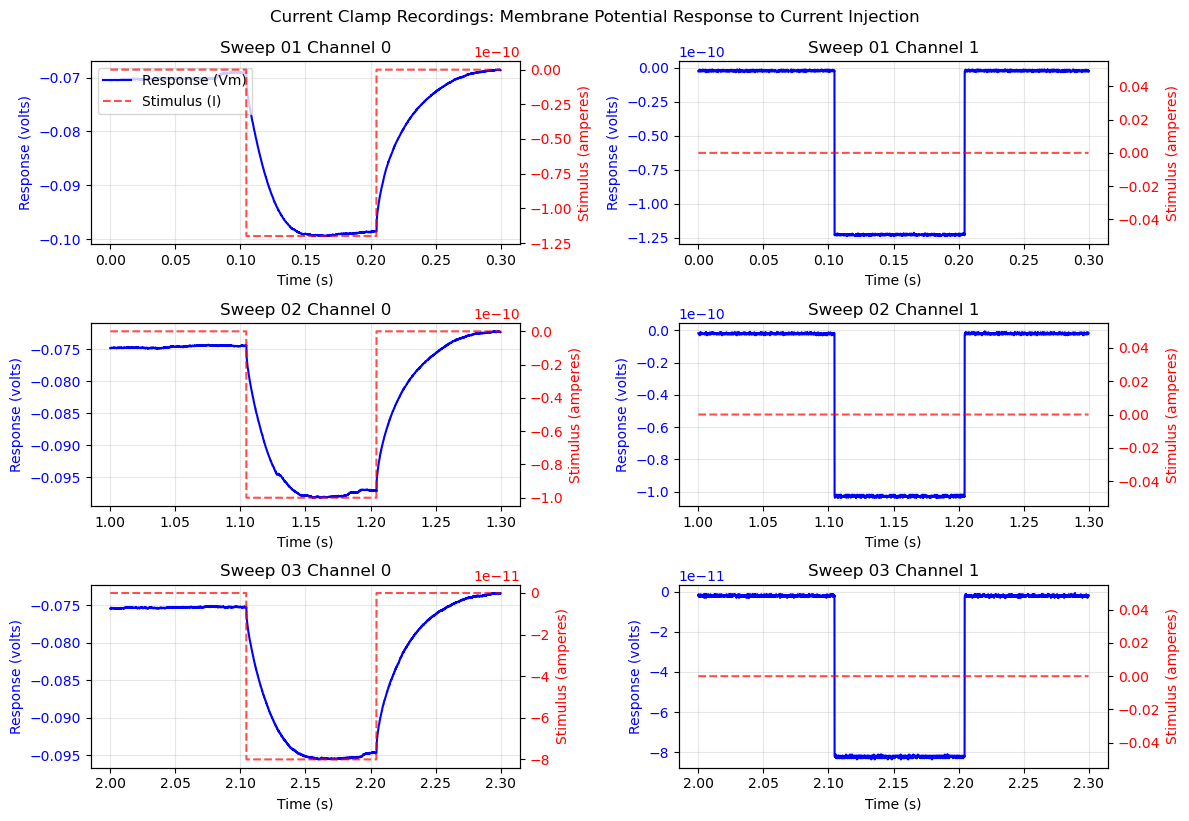

In [8]:
# Function to extract current clamp response and stimulus data
def get_current_clamp_data(sweep_num, channel):
    """Extract response and stimulus data for a current clamp sweep"""
    resp_key = f"current_clamp-response-{sweep_num:02d}-ch-{channel}"
    stim_key = f"stimulus-{sweep_num:02d}-ch-{channel}"
    
    response = nwb.acquisition[resp_key]
    stimulus = nwb.stimulus[stim_key]
    
    # Create time vector
    time = np.arange(response.data.shape[0]) / response.rate + response.starting_time
    
    # Apply conversions to get data in proper units
    resp_data = response.data[:] * response.conversion
    stim_data = stimulus.data[:] * stimulus.conversion
    
    return time, resp_data, stim_data, response.unit, stimulus.unit

# Plot first 3 current clamp sweeps for both channels
plt.figure(figsize=(12, 8))

for i, sweep_num in enumerate([1, 2, 3]):
    for ch in [0, 1]:
        subplot_idx = i * 2 + ch + 1
        
        time, resp_v, stim_i, resp_unit, stim_unit = get_current_clamp_data(sweep_num, ch)
        
        # Create subplot with dual y-axes
        ax1 = plt.subplot(3, 2, subplot_idx)
        
        # Plot membrane potential
        line1 = ax1.plot(time, resp_v, 'b-', label='Response (Vm)', linewidth=1.5)
        ax1.set_ylabel(f'Response ({resp_unit})', color='b')
        ax1.tick_params(axis='y', labelcolor='b')
        
        # Plot stimulus current on secondary axis
        ax2 = ax1.twinx()
        line2 = ax2.plot(time, stim_i, 'r--', label='Stimulus (I)', alpha=0.7)
        ax2.set_ylabel(f'Stimulus ({stim_unit})', color='r')
        ax2.tick_params(axis='y', labelcolor='r')
        
        ax1.set_xlabel('Time (s)')
        ax1.set_title(f'Sweep {sweep_num:02d} Channel {ch}')
        ax1.grid(True, alpha=0.3)
        
        # Add legend only to first subplot
        if subplot_idx == 1:
            lines = line1 + line2
            labels = [l.get_label() for l in lines]
            ax1.legend(lines, labels, loc='upper left')

plt.tight_layout()
plt.suptitle('Current Clamp Recordings: Membrane Potential Response to Current Injection', y=1.02)
plt.show()

### Example 2: Protocol-Specific Analysis

In [9]:
# Identify sweeps with laser stimulation protocols
laser_sweeps = []
current_step_sweeps = []

for key in stim_keys[:20]:  # Limit to first 20 for efficiency
    stim = nwb.stimulus[key]
    description = stim.description.strip()
    
    if 'laser pulse' in description:
        sweep_num = int(key.split('-')[1])
        channel = int(key.split('-')[-1])
        laser_sweeps.append((sweep_num, channel, description))
    elif 'steps' in description and 'pA increments' in description:
        sweep_num = int(key.split('-')[1])
        channel = int(key.split('-')[-1])
        current_step_sweeps.append((sweep_num, channel, description))

print(f"Found {len(laser_sweeps)} laser stimulation sweeps")
print(f"Found {len(current_step_sweeps)} current step sweeps")

# Plot examples of different protocol types if available
if laser_sweeps and current_step_sweeps:
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))
    
    # Plot laser stimulation example
    sweep_num, ch, desc = laser_sweeps[0]
    time, resp_v, stim_i, resp_unit, stim_unit = get_current_clamp_data(sweep_num, ch)
    
    axes[0, 0].plot(time, resp_v, 'b-', linewidth=1.5)
    axes[0, 0].set_title(f'Laser Stimulation\nSweep {sweep_num:02d} Ch {ch}')
    axes[0, 0].set_ylabel(f'Response ({resp_unit})')
    axes[0, 0].grid(True, alpha=0.3)
    
    axes[0, 1].plot(time, stim_i, 'r-', linewidth=1.5)
    axes[0, 1].set_title('Stimulus Current')
    axes[0, 1].set_ylabel(f'Stimulus ({stim_unit})')
    axes[0, 1].grid(True, alpha=0.3)
    
    # Plot current step example
    sweep_num, ch, desc = current_step_sweeps[0]
    time, resp_v, stim_i, resp_unit, stim_unit = get_current_clamp_data(sweep_num, ch)
    
    axes[1, 0].plot(time, resp_v, 'b-', linewidth=1.5)
    axes[1, 0].set_title(f'Current Step\nSweep {sweep_num:02d} Ch {ch}')
    axes[1, 0].set_ylabel(f'Response ({resp_unit})')
    axes[1, 0].set_xlabel('Time (s)')
    axes[1, 0].grid(True, alpha=0.3)
    
    axes[1, 1].plot(time, stim_i, 'r-', linewidth=1.5)
    axes[1, 1].set_title('Stimulus Current')
    axes[1, 1].set_ylabel(f'Stimulus ({stim_unit})')
    axes[1, 1].set_xlabel('Time (s)')
    axes[1, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

Found 0 laser stimulation sweeps
Found 20 current step sweeps


## Working with Multiple Files

This section demonstrates how to programmatically explore multiple NWB files in the dataset for broader analyses.

In [10]:
# Survey file types across the first 30 files
print("Surveying data modalities in the first 30 files...")

file_survey = []
for asset in islice(assets, 30):
    path = asset.path
    # Extract metadata from filename
    parts = path.split('/')[-1].split('_')
    subject_id = parts[0].replace('sub-', '')
    session_info = parts[1].replace('ses-', '')
    
    file_info = {
        'path': path,
        'subject_id': subject_id,
        'session': session_info,
        'size_mb': asset.size / 1e6,
        'modality': 'icephys' if 'icephys' in path else 'other'
    }
    file_survey.append(file_info)

survey_df = pd.DataFrame(file_survey)
print(f"\nFile modality distribution:")
print(survey_df['modality'].value_counts())

print(f"\nSubjects represented (first 30 files):")
unique_subjects = survey_df['subject_id'].unique()
print(f"Number of unique subjects: {len(unique_subjects)}")
print(f"Subject IDs: {sorted(unique_subjects)}")

Surveying data modalities in the first 30 files...

File modality distribution:
modality
icephys    30
Name: count, dtype: int64

Subjects represented (first 30 files):
Number of unique subjects: 7
Subject IDs: ['235-cage', '3003', '4481', '4484', '4484-', '4945', '5013']


## Key Findings and Next Steps

This exploration reveals that Dandiset 001195 contains:

1. **Rich intracellular electrophysiology data** from dorsal raphe dopamine neurons and their projection targets
2. **Diverse experimental protocols** including current steps, optogenetic stimulation, and voltage clamp recordings
3. **Comprehensive metadata** linking recordings to specific brain regions, genetic lines, and experimental conditions
4. **Well-structured data organization** enabling systematic analysis across subjects, cells, and protocols

### Potential Analyses:
- **Intrinsic properties**: Analyze current-voltage relationships and membrane properties across cell types
- **Optogenetic responses**: Compare responses to different laser stimulation protocols
- **Cross-region analysis**: Study differences between recordings from different brain areas (CeA, BNST, DRN)
- **Meta-analysis**: Aggregate data across subjects and sessions for population-level insights

The standardized NWB format and rich metadata make this dataset well-suited for reproducible secondary analyses of dopaminergic mechanisms in social behavior and affective states.